In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [3]:
# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

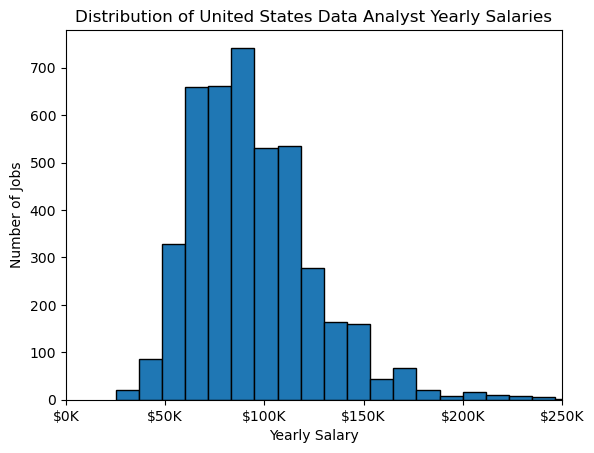

In [7]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
# Alternatively, with matplotlib
# plt.hist(df_DA_US['salary_year_avg'], bins=30, edgecolor='black')

plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

🟩 Data Scientist Hourly Salaries (2.17.1) - Problem
Matplotlib Histograms
Problem Statement:
Create a histogram to show the distribution of hourly salaries (use salary_hour_avg column) for Data Scientist job postings:

Create a new DataFrame called df_DS to filter out 'Data Scientist' jobs.
Customize the plot by setting the number of bins to 40 and the bar color to blue.
Label the x-axis as 'Hourly Salary' and the y-axis as 'Number of Jobs'.

In [8]:
df_DS = df[df['job_title_short'] == 'Data Scientist']
df_DS = df_DS.dropna(subset=['salary_hour_avg'])

In [9]:
df_DS.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
448,Data Scientist,Jnr Data Scientist for exciting projects with ...,Anywhere,via Upwork,Full-time,True,Sudan,2023-05-26 13:40:09,False,False,Sudan,hour,NaN,9.5,Upwork,"[r, python, aws, azure, tidyverse, excel, powe...","{'analyst_tools': ['excel', 'powerpoint'], 'cl..."
734,Data Scientist,"Data Scientist - NLP, regex, OpenCV, Python, A...",Anywhere,via Upwork,Contractor,True,"Illinois, United States",2023-04-23 13:04:21,False,False,United States,hour,NaN,15.0,Upwork,"[python, aws]","{'cloud': ['aws'], 'programming': ['python']}"
881,Data Scientist,Data Scientist with expertise in deep learning...,Anywhere,via Upwork,Contractor,True,"Texas, United States",2023-07-02 13:05:15,False,False,United States,hour,NaN,35.5,Upwork,None,None


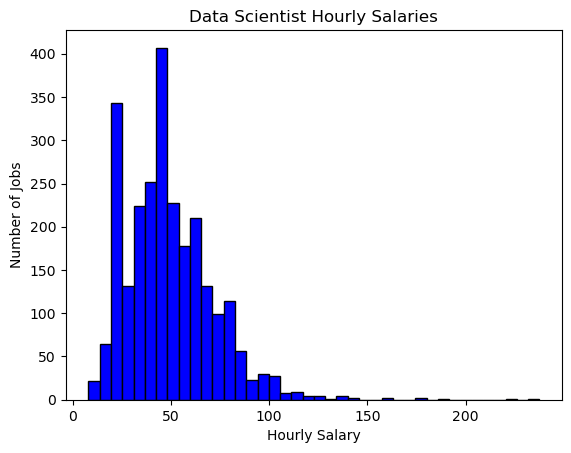

In [13]:
df_DS['salary_hour_avg'].plot(kind='hist', bins =40, color='blue', edgecolor='black')

plt.title('Data Scientist Hourly Salaries')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')

plt.show()

🟨 Job Postings by Number of Skills (2.17.2) - Problem
Matplotlib Histograms
Problem Statement:
Create a histogram to show the distribution of job postings by the number of skills listed using the job_skills column:

Create a new DataFrame called df_skills to filter out job postings with non-null job_skills.
Customize the plot by setting the number of bins to 55, the bar color to 'magenta'
Add a title 'Distribution of Job Postings by Number of Skills Listed'.
Label the x-axis as 'Number of Skills' and the y-axis as 'Number of Job Postings'.

In [ ]:
df = df.copy()
df_exploded = df.explode('job_skills')
df_exploded.head()

In [ ]:
df_skills = df_exploded.dropna(subset=['job_skills'])
df_skills.head(3)

In [ ]:
df_skills.groupby(['job_title_short', 'job_skills']).agg('count')

In [20]:
df = df.copy()
df_skills = df.dropna(subset=['job_skills']).copy()

In [21]:
df_skills.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [22]:
df_skills['num_skills'] = df_skills['job_skills'].apply(len) #apply method to count the jobs in the list of job_skills
df_skills.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,num_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",6
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",9


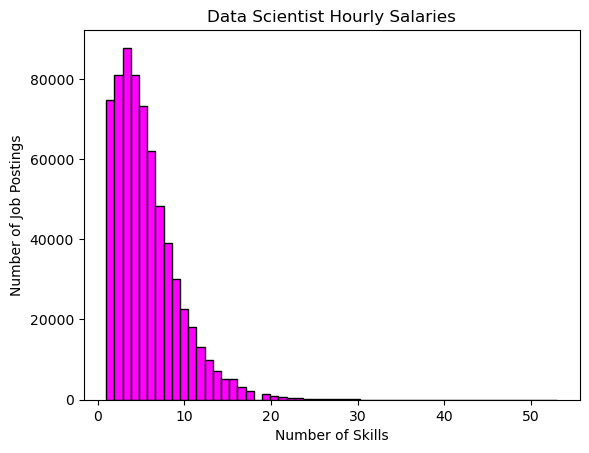

In [23]:
df_skills['num_skills'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')

plt.title('Data Scientist Hourly Salaries')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')

plt.show()

🟥 Data Engineer Salaries (2.17.3) - Problem
Matplotlib Histograms
Problem Statement:
Create a histogram to show the distribution of average yearly salaries (salary_year_avg) for Data Engineer job postings:

Create a new DataFrame called df_DE to filter out 'Data Engineer' jobs.
Customize the plot by setting the number of bins to 50, the bar color to red
Add annotations for the mean and median salaries, using plt.axvline(); for the parameters specify:
color: 'blue'/'green'
linestyle: 'dashed'
label: e.g., f'Mean: ${mean_salary:,.0f}'
Label the x-axis as 'Yearly Salary' and the y-axis as 'Number of Jobs'.

In [24]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()

In [26]:
df_DE = df_DE.dropna(subset='salary_year_avg').copy()

In [27]:
df_DE.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"[mongodb, mongodb, python, r, sql, mysql, mari...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."


In [28]:
df_DE['mean_salary'] = df_DE['salary_year_avg'].agg('mean')

In [30]:
df_DE['median_salary'] = df_DE['salary_year_avg'].agg('median')

In [49]:
mean_salary = df_DE['salary_year_avg'].agg('mean') #just need the one mean, not repeated in a column

In [50]:
median_salary = df_DE['salary_year_avg'].agg('median') #just need the one median, not repeated in a column

In [56]:
job_count = df_DE['job_title_short'].agg('count')
job_count

mean_jobs = 400

In [31]:
df_DE.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,mean_salary,median_salary
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"[mongodb, mongodb, python, r, sql, mysql, mari...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",130125.60425,125000.0
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}",130125.60425,125000.0


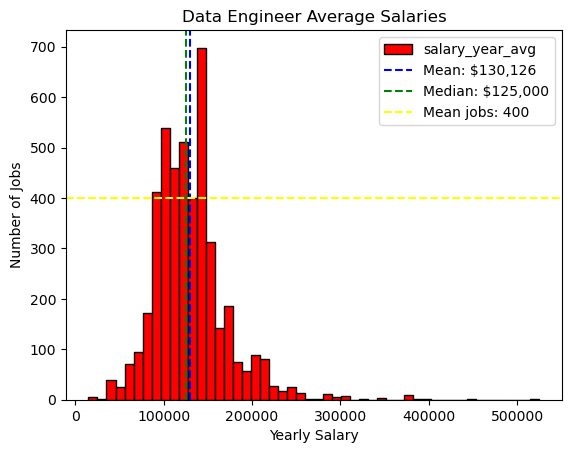

In [61]:
df_DE['salary_year_avg'].plot(
    kind='hist', 
    bins=50, 
    color='red', 
    edgecolor='black',
    )

plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')

plt.axhline(mean_jobs, color='yellow', linestyle='dashed', label=f'Mean jobs: {mean_jobs}')

plt.title('Data Engineer Average Salaries')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary')
plt.legend()

plt.show()